# Machine Learning Project
# Employee Turnover

In [1]:
# Data Handling and Exploratiry Data Analysis Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Model Preparation and Training Libraries

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, roc_auc_score, RocCurveDisplay

In [2]:
# Getting the data
original_df = pd.read_csv("HR_comma_sep.csv")
original_df.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   

   salary  
0     low  
1  medium

## Performing Data Quality Checks

In [3]:
# Verifying the Data
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Checking the values for each column
for c in original_df.columns:
    print(original_df[c].describe())
    print("\n")

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64


count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64


count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64


count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64


count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.0000

In [5]:
# Checking the target column
original_df["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [6]:
# Checking the categories in 'sales' column
original_df["sales"].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

## Heatmap of Correlation between all the numerical features.

<Axes: >

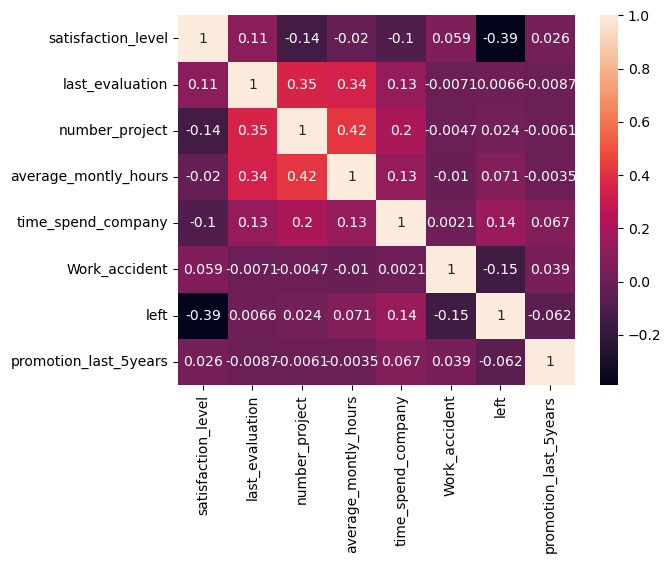

In [7]:
sns.heatmap(original_df.drop(["sales", "salary"], axis=1).corr(), annot=True)

## Exploratory Data Analysis

In [8]:
df = original_df.copy()

In [9]:
df["sales"] = df["sales"].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'],
                                  ['Sales', 'Accounting', 'HR', 'Technical', 'Support', 'Management',       'IT', 'Product Management',
                                   'Marketing', 'R and D'])
df["salary"] = df["salary"].replace(['low', 'medium', 'high'], ['Low', 'Medium', 'High'])
df = df.rename(columns={"sales": "dept", "Work_accident": "work_accident"})
df.sample(5)

satisfaction_level  last_evaluation  number_project  \
5731                 0.59             0.66               3   
4158                 0.73             0.71               5   
4159                 0.90             0.62               4   
14409                0.10             0.89               7   
1394                 0.41             0.52               2   

       average_montly_hours  time_spend_company  work_accident  left  \
5731                    166                   3              1     0   
4158                    215                   6              1     0   
4159                    258                   3              0     0   
14409                   285                   4              0     1   
1394                    142                   3              0     1   

       promotion_last_5years        dept  salary  
5731                       0  Management     Low  
4158                       0   Technical  Medium  
4159                       0   Technical  Medium  
14409                      0   Technical     Low  
1394                       0       Sales  Medium

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

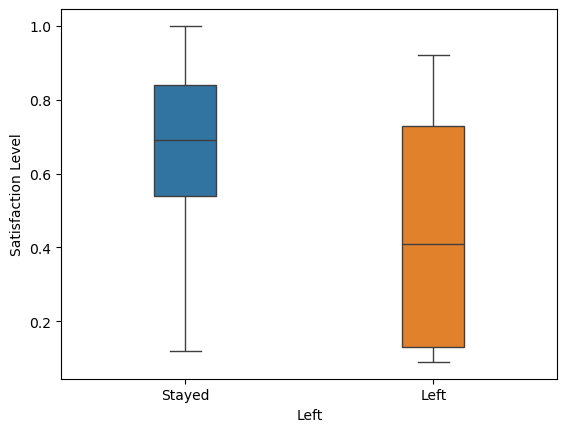

In [11]:
ax = sns.boxplot(data = df, x = "left", y = "satisfaction_level", hue = "left" , width= 0.25, legend=False)
ax.set(xlabel="Left", ylabel="Satisfaction Level")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Stayed", "Left"])
plt.show()

#### The graph shows that the people who leave usually have lower Satisfaction Level.

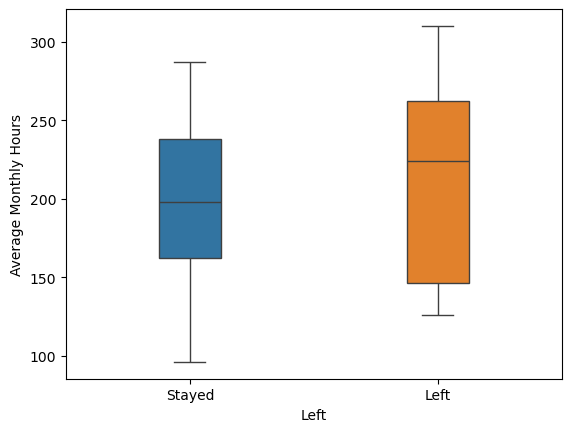

In [12]:
ax = sns.boxplot(data = df, x = "left", y = "average_montly_hours", hue = "left" , width= 0.25, legend=False)
ax.set(xlabel="Left", ylabel="Average Monthly Hours")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Stayed", "Left"])
plt.show()

#### The graph shows that people who leave usually have higher monthly work hours.

### Distribution Plot of Satisfaction Level

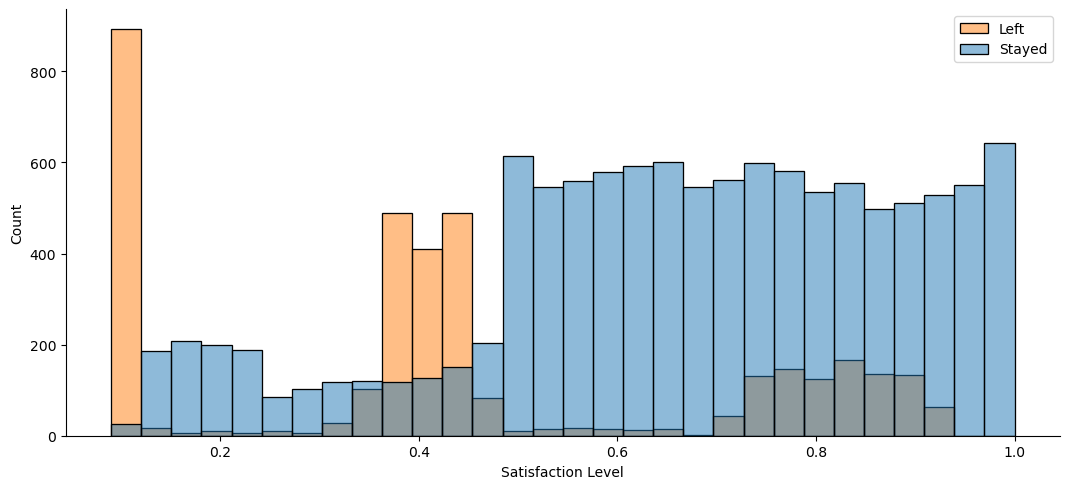

In [13]:
ax = sns.displot(df, x = "satisfaction_level", hue = "left", legend=False)
ax.figure.set_size_inches(12,5)
ax.set(xlabel = "Satisfaction Level")
# ax.add_legend({0: "Stayed", 1: "Left"})
# legend_handles, _ = plt.get_legend_handles_labels()
plt.legend(['Left','Stayed'])

### Distribution Plot of Last Evaluation Score

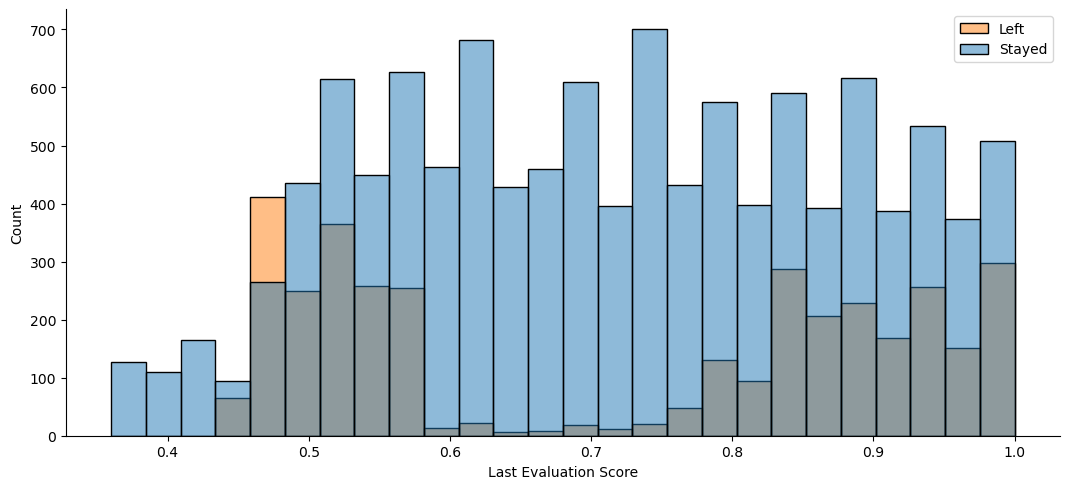

In [14]:
ax = sns.displot(df, x = "last_evaluation", hue = "left", legend=False)
ax.figure.set_size_inches(12,5)
ax.set(xlabel = "Last Evaluation Score")
# ax.add_legend({0: "Stayed", 1: "Left"})
# legend_handles, _ = plt.get_legend_handles_labels()
plt.legend(['Left','Stayed'])

### Distribution Plot of Last Evaluation Score

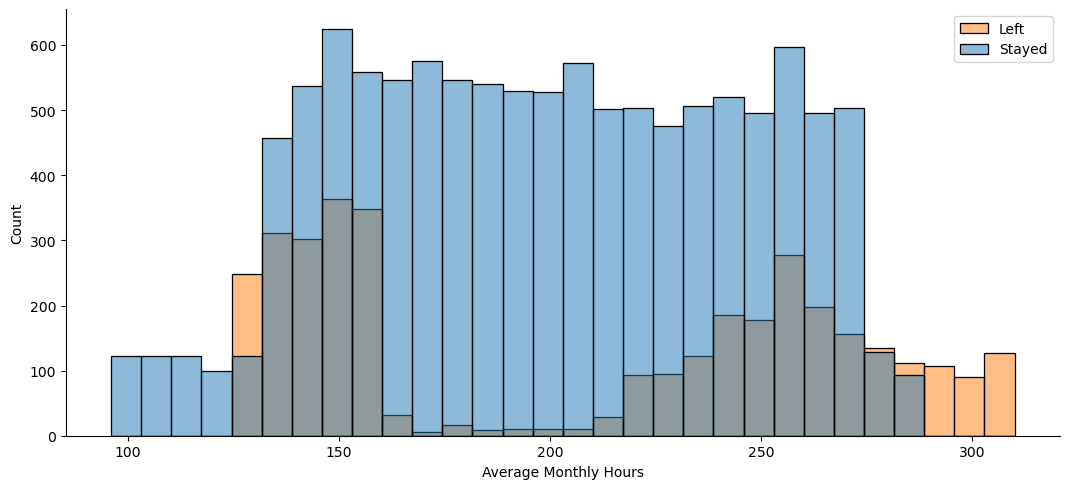

In [15]:
ax = sns.displot(df, x = "average_montly_hours", hue = "left", legend=False)
ax.figure.set_size_inches(12,5)
ax.set(xlabel = "Average Monthly Hours")
# ax.add_legend({0: "Stayed", 1: "Left"})
# legend_handles, _ = plt.get_legend_handles_labels()
plt.legend(['Left','Stayed'])

### Bar Plot of Number of Projects for Staying and  Leaving Employees

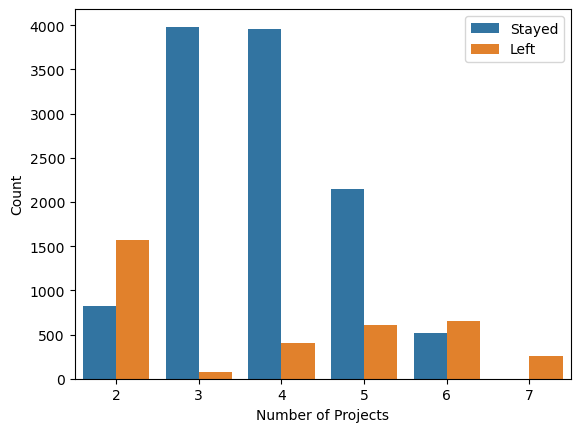

In [16]:
ax = sns.countplot(data = df, x = "number_project", hue = "left")
ax.set(xlabel="Number of Projects", ylabel="Count")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Stayed','Left'])
plt.show()

## Various Other Relationship Plots

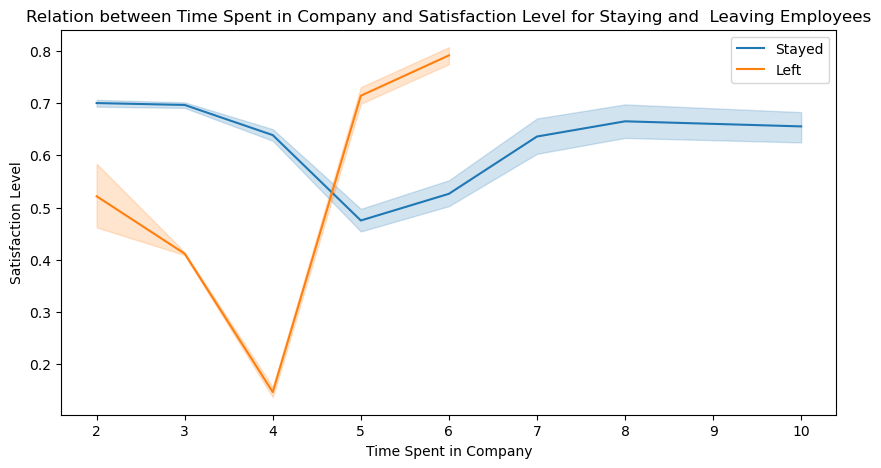

In [17]:
plt.subplots(figsize = (10, 5))
plt.title("Relation between Time Spent in Company and Satisfaction Level for Staying and  Leaving Employees")
ax = sns.lineplot(data = df, x = "time_spend_company", y = "satisfaction_level", hue = "left")
ax.set(xlabel="Time Spent in Company", ylabel="Satisfaction Level")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Stayed','Left'])
plt.show()

#### 1. Employees that have a lower satisfaction level during the first four years usually tend to leave.
#### 2. Employees that have a high satisfaction level during the fifth and sixth years usually tend to leave.
#### 3. Employess that have stayed for 7 years or more do not leave.

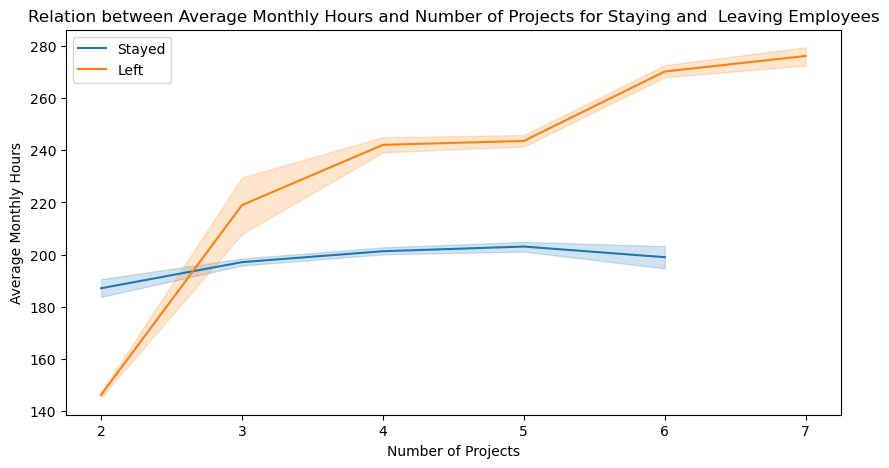

In [18]:
plt.subplots(figsize = (10, 5))
plt.title("Relation between Average Monthly Hours and Number of Projects for Staying and  Leaving Employees")
ax = sns.lineplot(data = df, x = "number_project", y = "average_montly_hours", hue = "left" )
ax.set(xlabel="Number of Projects", ylabel="Average Monthly Hours")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Stayed','Left'])
plt.show()

In [19]:
print(df[(df["average_montly_hours"] > 200) & (df["number_project"] >= 3) & (df["left"] == 1)].shape[0] + df[(df["average_montly_hours"] < 160) & (df["number_project"] == 2) & (df["left"] == 1)].shape[0])
print(df[(df["left"] == 1)].shape[0])

3350
3571


#### Employees who left were mostly people who had three or more projects and worked for more than 200 hours or people with two projects who worked for less than 160 hours.

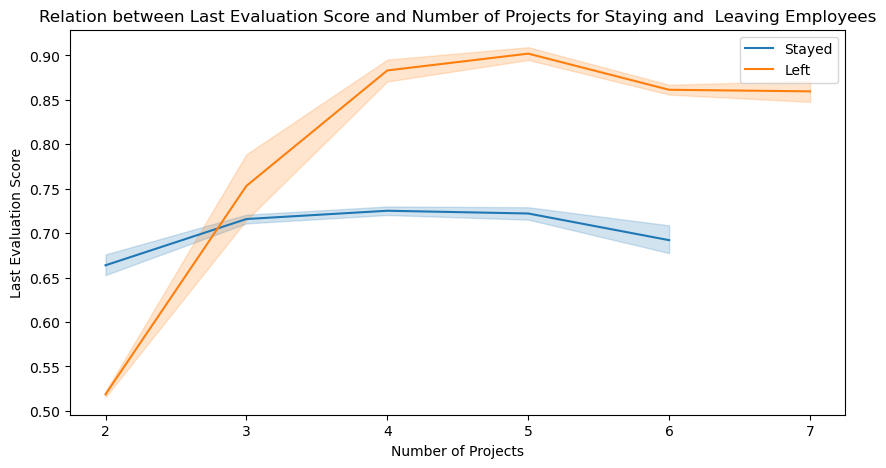

In [20]:
plt.subplots(figsize = (10, 5))
plt.title("Relation between Last Evaluation Score and Number of Projects for Staying and  Leaving Employees")
ax = sns.lineplot(data = df, x = "number_project", y = "last_evaluation", hue = "left" )
ax.set(xlabel="Number of Projects", ylabel="Last Evaluation Score")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Stayed','Left'])
plt.show()

### All employees who have 7 projects have left.

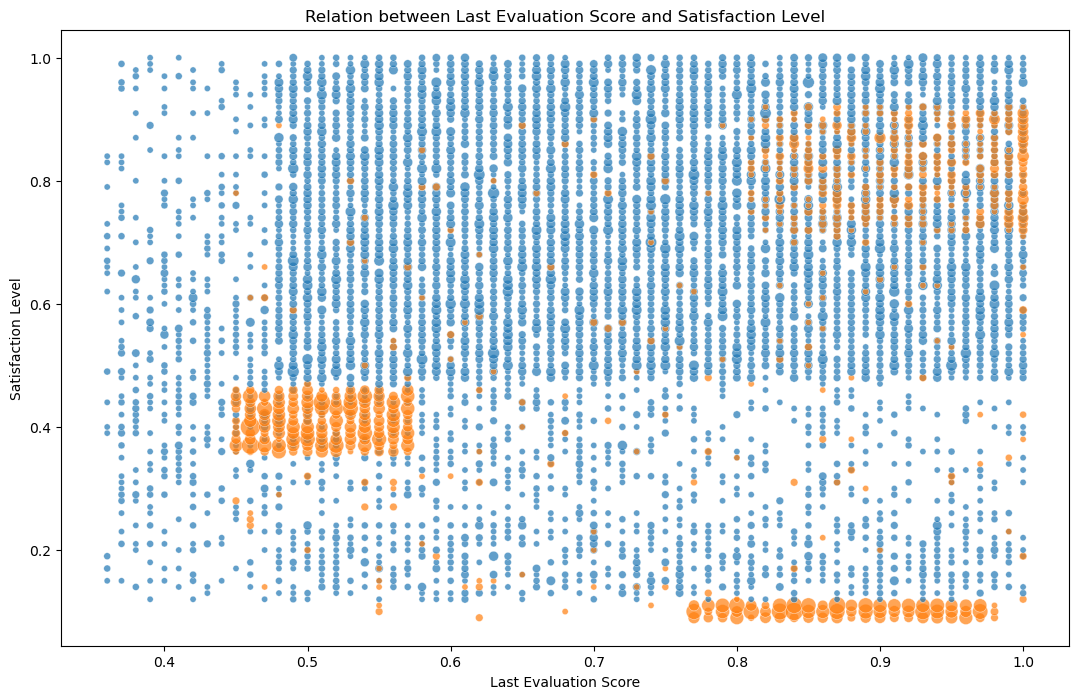

In [21]:
last_sat = df.groupby(["last_evaluation", "satisfaction_level", "left"]).size().reset_index(name = "Count")
plt.subplots(figsize=(13, 8))
plt.title("Relation between Last Evaluation Score and Satisfaction Level")
ax = sns.scatterplot(data=last_sat, x="last_evaluation", y="satisfaction_level", hue="left", size="Count", sizes=(20, 200), legend = False, alpha=0.7)
ax.set(xlabel="Last Evaluation Score", ylabel="Satisfaction Level")
plt.show()

#### The graph shows clear patterns regarding the employees who leave.

<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

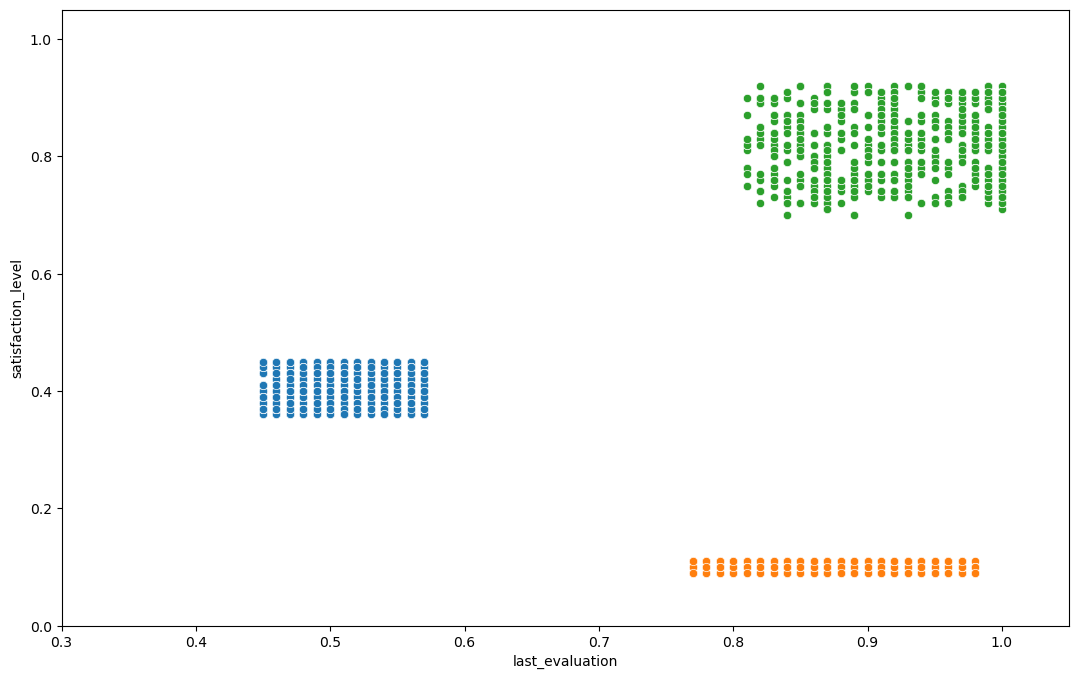

In [22]:
plt.subplots(figsize = (13, 8))
plt.xlim(0.3 , 1.05)
plt.ylim(0 , 1.05)
sns.scatterplot(data = df[(df["left"] == 1 ) & df["satisfaction_level"].between(0.35, 0.45) & df["last_evaluation"].between(0.45, 0.57)],
                x = "last_evaluation", y = "satisfaction_level")
sns.scatterplot(data = df[ df["satisfaction_level"].between(0, 0.11) & df["last_evaluation"].between(0.75, 1) & (df["left"] == 1 )],
                 x = "last_evaluation", y = "satisfaction_level")
sns.scatterplot(data = df[ df["satisfaction_level"].between(0.7, 0.92) & df["last_evaluation"].between(0.8, 1) & (df["left"] == 1 )],
                 x = "last_evaluation", y = "satisfaction_level")

The graph shows three groups of employees with higher chances of leaving, with -
- Satisfaction level between 0.35 and 0.45 and last evaluation score between 0.45 and 0.57
- Satisfaction level between 0 and 0.11 and last evaluation score between 0.75 and 1
- Satisfaction level between 0.7 and 0.92 and last evaluation score between 0.8 and 1

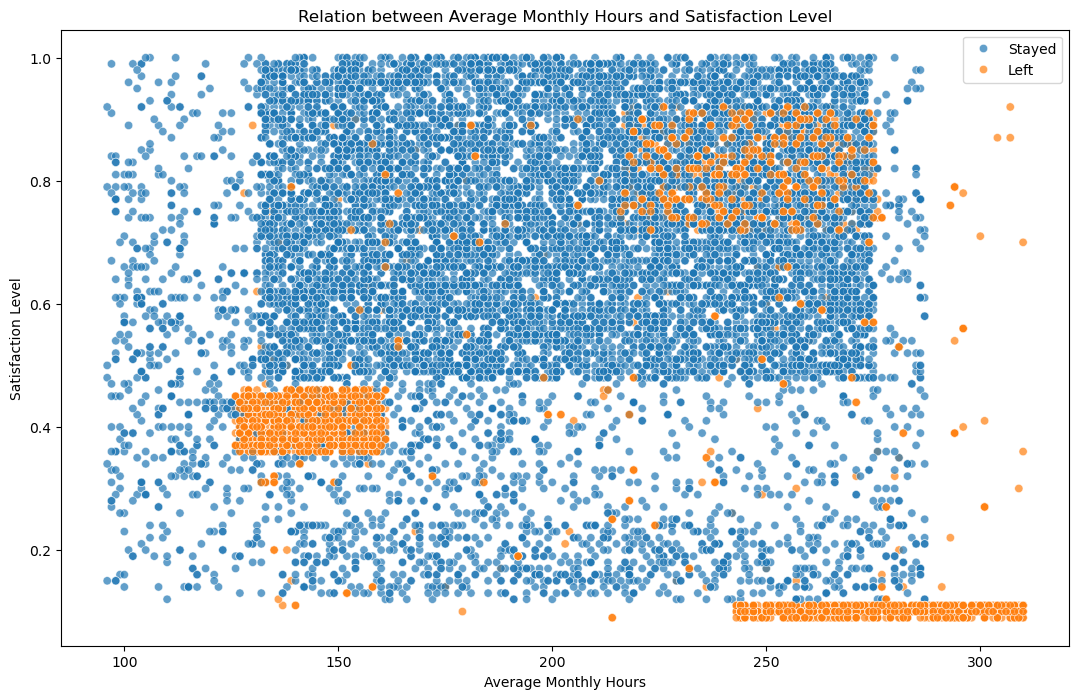

In [23]:
plt.subplots(figsize = (13, 8))
plt.title("Relation between Average Monthly Hours and Satisfaction Level")
ax = sns.scatterplot(data = df, x = "average_montly_hours", y = "satisfaction_level", hue = "left", alpha = 0.7)
ax.set(xlabel="Average Monthly Hours", ylabel="Satisfaction Level")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Stayed','Left'])
plt.show()

#### This graph too shows clear patterns regarding employees who leave.

<Axes: xlabel='average_montly_hours', ylabel='satisfaction_level'>

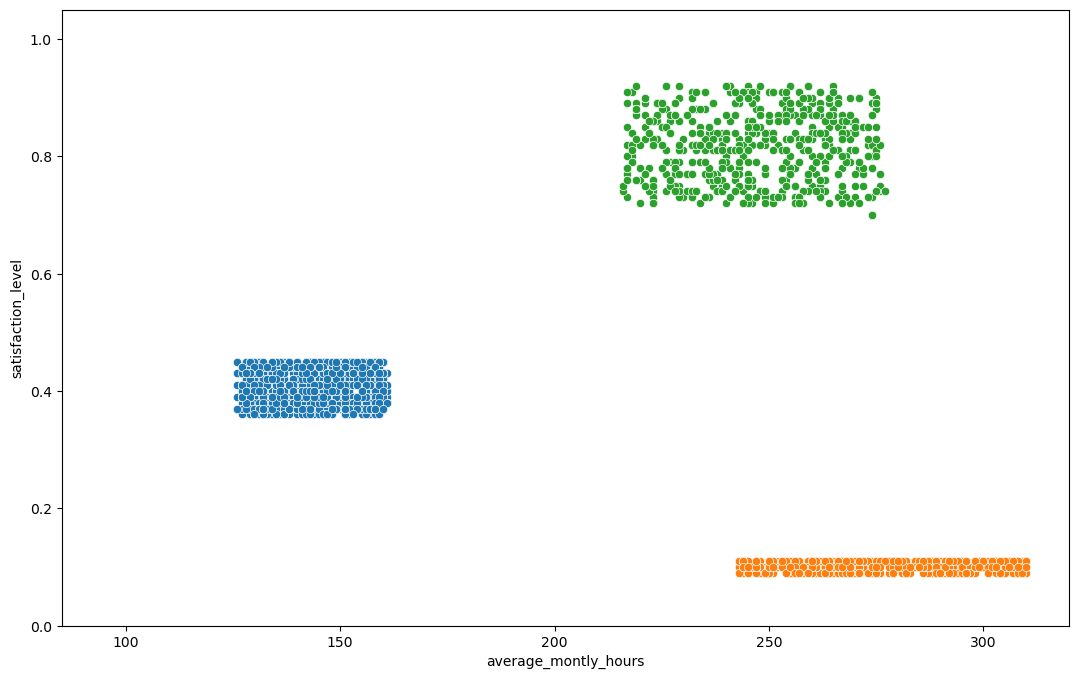

In [24]:
plt.subplots(figsize = (13, 8))
plt.xlim(85, 320)
plt.ylim(0 , 1.05)
sns.scatterplot(data = df[df["satisfaction_level"].between(0.35, 0.45) & df["average_montly_hours"].between(120, 170) & (df["left"] == 1 )],
                x = "average_montly_hours", y = "satisfaction_level" )
sns.scatterplot(data = df[df["satisfaction_level"].between(0, 0.11) & df["average_montly_hours"].between(240, 320) & (df["left"] == 1 )],
                x = "average_montly_hours", y = "satisfaction_level" )
sns.scatterplot(data = df[df["satisfaction_level"].between(0.7, 0.92) & df["average_montly_hours"].between(216, 280) & (df["left"] == 1 )],
                x = "average_montly_hours", y = "satisfaction_level" )

The graph shows three groups of employees with higher chances of leaving, with -
- Satisfaction level between 0.35 and 0.45 and average monthly hours between 120 and 170
- Satisfaction level between 0 and 0.11 and average monthly hours between 240 and 320
- Satisfaction level between 0.7 and 0.92 and average monthly hours between 216 and 280

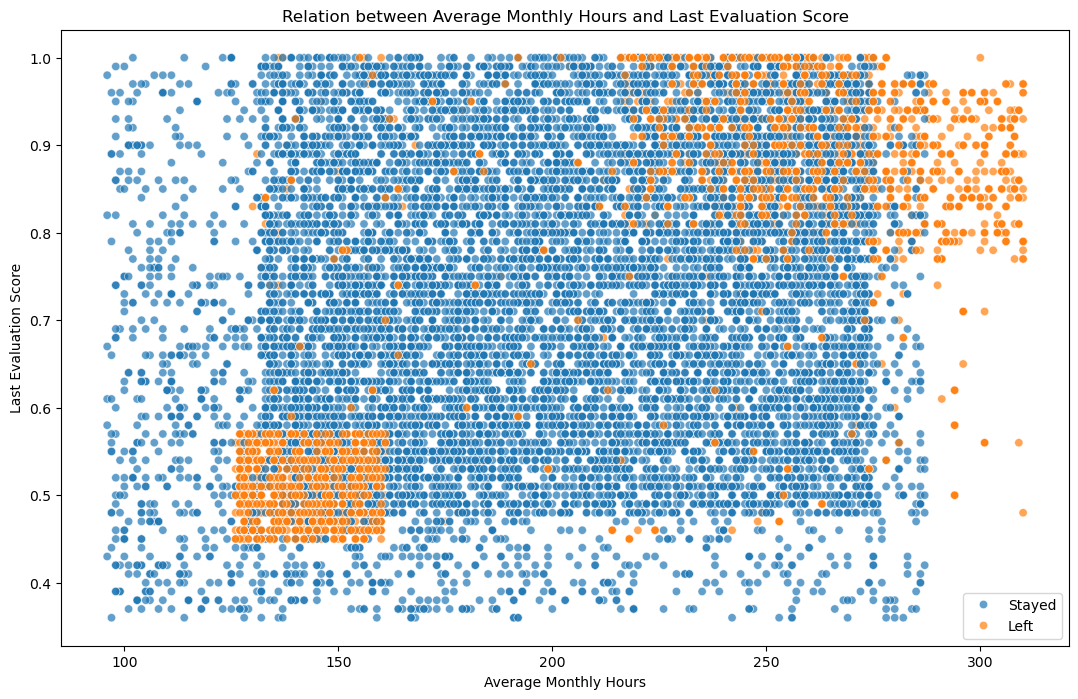

In [25]:
plt.subplots(figsize = (13, 8))
plt.title("Relation between Average Monthly Hours and Last Evaluation Score")
ax = sns.scatterplot(data = df, x = "average_montly_hours", y = "last_evaluation", hue = "left", alpha = 0.7)
ax.set(xlabel="Average Monthly Hours", ylabel="Last Evaluation Score")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Stayed','Left'])
plt.show()

In [26]:
df[df["satisfaction_level"].between(0.35, 0.45) & df["average_montly_hours"].between(120, 170) &
df["last_evaluation"].between(0.45, 0.57)]["left"].value_counts(normalize = True)

left
1    0.971199
0    0.028801
Name: proportion, dtype: float64

### Over 97% of the people who have a *satisfaction level* between **0.35 and 0.45**, work between **120 to 170** *hours monthly* and have a *evaluation score* between **0.45 and 0.57** have left the organisation.

#### Dividing the above 97% by Salary

In [27]:
salary_compare = pd.concat([df[df["satisfaction_level"].between(0.35, 0.45) & df["average_montly_hours"].between(120, 170) &
                            df["last_evaluation"].between(0.45, 0.57) & (df["left"] == 1)]["salary"].value_counts(),
                            df[df["satisfaction_level"].between(0.35, 0.45) & df["average_montly_hours"].between(120, 170) &
                            df["last_evaluation"].between(0.45, 0.57)]["salary"].value_counts()], axis= 1)
salary_compare.columns = ["Left", "Total"]
salary_compare["Left Percantage"] = (salary_compare["Left"]/salary_compare["Total"])*100
salary_compare

Left  Total  Left Percantage
salary                              
Low      884    900        98.222222
Medium   521    543        95.948435
High      45     50        90.000000

In [28]:
df[df["satisfaction_level"].between(0.7, 0.92) & df["average_montly_hours"].between(216, 280) &
df["last_evaluation"].between(0.8, 1)]["left"].value_counts(normalize = True)

left
1    0.575352
0    0.424648
Name: proportion, dtype: float64

### Over 57% of the people who have a *satisfaction level* between **0.7 and 0.92**, work between **216 to 280** *hours monthly* and have a *evaluation score* between **0.8 and 1** have left the organisation.

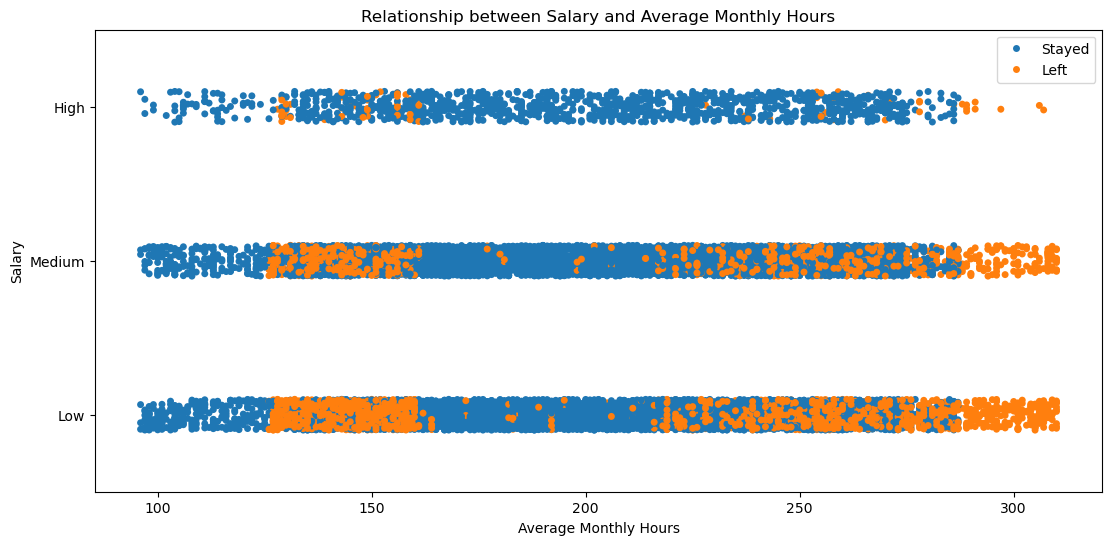

In [29]:
plt.subplots(figsize = (13, 6))
plt.title("Relationship between Salary and Average Monthly Hours")
ax = sns.stripplot(data=df, x = "average_montly_hours", y = "salary", hue="left", order=["High", "Medium", "Low"])
ax.set(xlabel="Average Monthly Hours", ylabel="Salary")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Stayed','Left'])
plt.show()

#### Employees with low salary have a greater chance of leaving if their monthly work hours are between 120 and 170, or if it is greater than 250

In [30]:
df[df["left"] == 0]["average_montly_hours"].max()

287

### All employees who work more than 287 hours monthly on an average, have left.

In [31]:
df[df["left"] == 0]["satisfaction_level"].min()

0.12

### All employees who have a satisfaction level below 0.12 have left.

In [32]:
sal_order = ["High", "Medium", "Low", "All"]

In [33]:
df2 = (pd.crosstab(df[df["left"] == 1]["salary"], df[df["left"] == 1]["dept"], margins=True, margins_name="All")
 /pd.crosstab(df["salary"], df["dept"], margins=True, margins_name="All"))
df2 = df2.reindex(index=sal_order)
df2

dept    Accounting        HR        IT  Management  Marketing  \
salary                                                          
High      0.067568  0.133333  0.048193    0.004444   0.112500   
Medium    0.298507  0.325905  0.181308    0.137778   0.180851   
Low       0.276536  0.274627  0.282430    0.327778   0.313433   
All       0.265971  0.290934  0.222494    0.144444   0.236597   

dept    Product Management   R and D     Sales   Support  Technical       All  
salary                                                                         
High              0.088235  0.078431  0.052045  0.056738   0.124378  0.066289  
Medium            0.227154  0.166667  0.170993  0.167728   0.256321  0.204313  
Low               0.232816  0.151099  0.332063  0.339442   0.275510  0.296884  
All               0.219512  0.153748  0.244928  0.248991   0.256250  0.238083

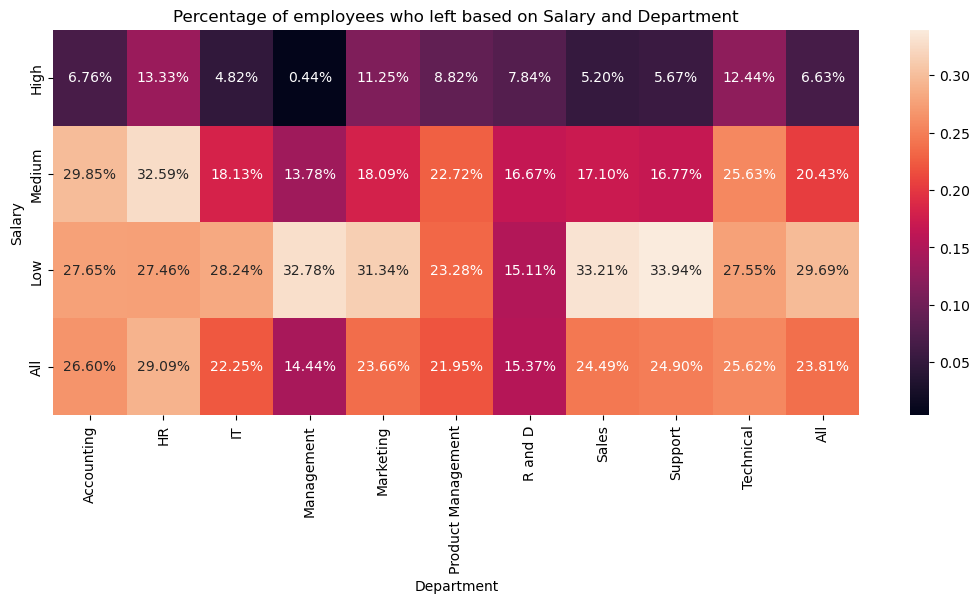

In [34]:
plt.subplots(figsize = (13, 5))
plt.title("Percentage of employees who left based on Salary and Department")
ax = sns.heatmap(df2, annot=True, fmt=".2%")
ax.set(xlabel="Department", ylabel="Salary")
plt.show()

#### 1. Support dept. employees with low salary have the highest chance of leaving.
#### 2. Management dept. employees with low salary have the second highest chance of leaving.
#### 3. HR dept. employees with Medium salary have the third highest chance of leaving.
#### 4. Employees with low salary have the highest chance of leaving on an average.
#### 5. Employees of HR dept. have the highest chance of leaving on an average.

In [35]:
pd.crosstab(df["promotion_last_5years"], df["left"], margins=True, margins_name="All")

left                       0     1    All
promotion_last_5years                    
0                      11128  3552  14680
1                        300    19    319
All                    11428  3571  14999

In [36]:
3552/14680

0.24196185286103541

### 24.2% of the people who did not recieve a promotion in the last five years left.
### Given that the average percentage of leaving employees is 23.81%, it would seem that getting a promotion in the last five years does not play a major role in deciding if an employee leaves.

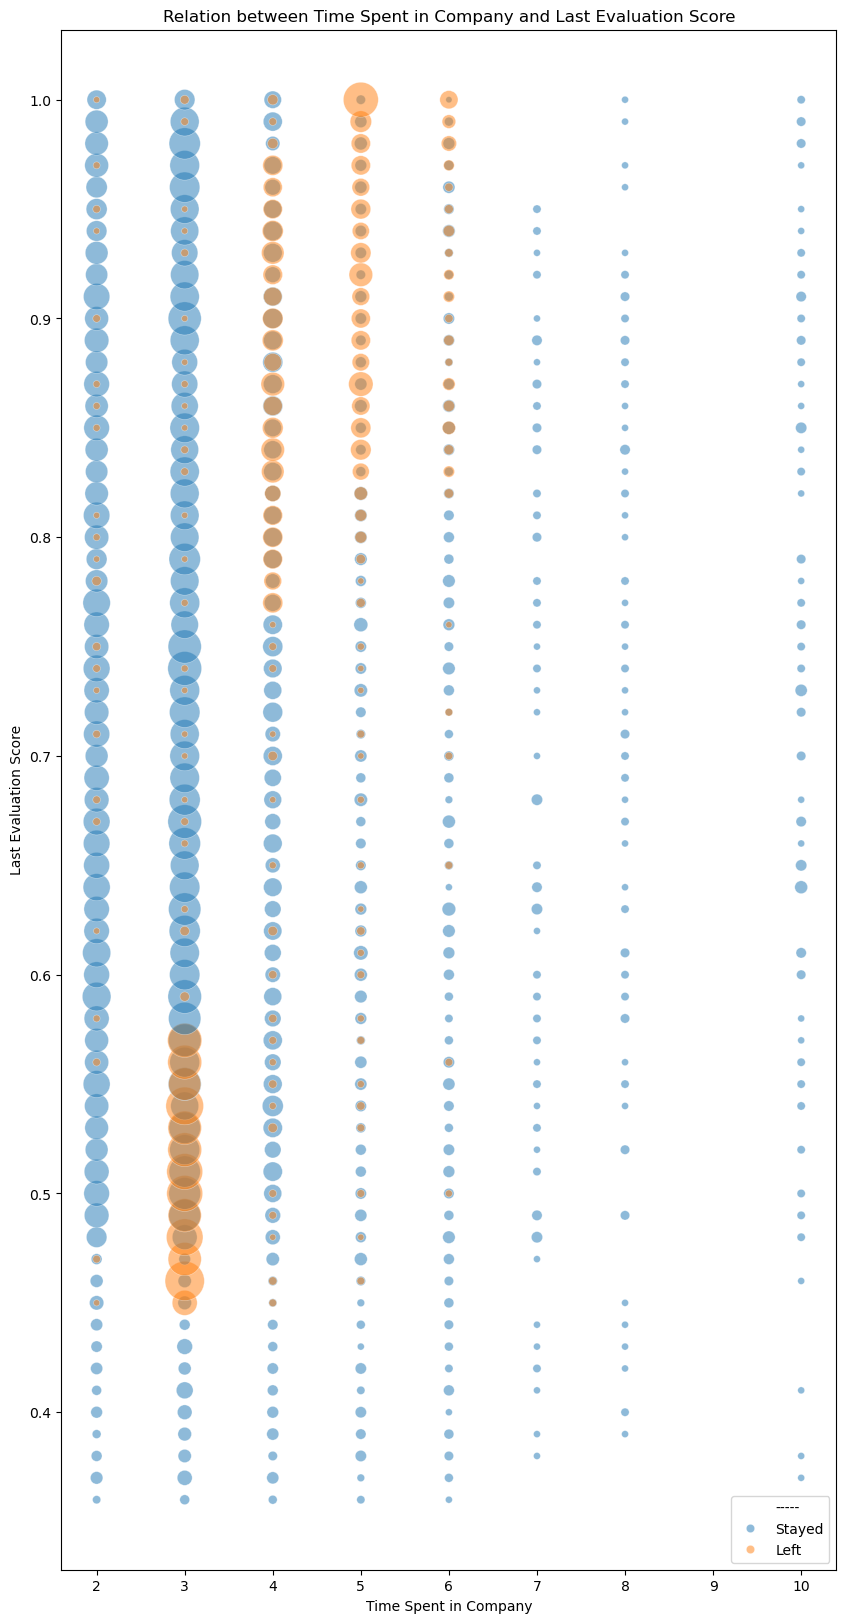

In [37]:
last_spent = df.groupby(["last_evaluation", "time_spend_company", "left"]).size().reset_index(name = "Count")

plt.subplots(figsize = (10, 20))
plt.title("Relation between Time Spent in Company and Last Evaluation Score")
ax = sns.scatterplot(data = last_spent, x = "time_spend_company", y = "last_evaluation", hue = "left", size = "Count", sizes = (20,800), alpha = 0.5)
ax.set(xlabel="Time Spent in Company", ylabel="Last Evaluation Score")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['-----', 'Stayed', 'Left'])
plt.show()

In [38]:
df3 = (pd.crosstab(df[df["left"] == 1]["number_project"], df[df["left"] == 1]["time_spend_company"], margins=True, margins_name="All")
 /pd.crosstab(df["number_project"], df["time_spend_company"], margins=True, margins_name="All"))
df3

time_spend_company         2         3         4         5         6   7   8  \
number_project                                                                 
2                   0.031250  0.824164  0.102941  0.216867  0.000000 NaN NaN   
3                   0.008765  0.005051  0.056604  0.118519  0.043165 NaN NaN   
4                   0.014860  0.013348  0.043328  0.584270  0.386047 NaN NaN   
5                   0.016245  0.010393  0.113689  0.728041  0.508929 NaN NaN   
6                   0.121212  0.066176  0.835067  0.388889  0.068966 NaN NaN   
7                   1.000000  1.000000  1.000000  1.000000       NaN NaN NaN   
All                 0.016338  0.246159  0.348064  0.565513  0.291086 NaN NaN   

time_spend_company  10       All  
number_project                    
2                  NaN  0.656198  
3                  NaN  0.017756  
4                  NaN  0.093700  
5                  NaN  0.221659  
6                  NaN  0.557922  
7                  NaN  1.000000  
All                NaN  0.238083

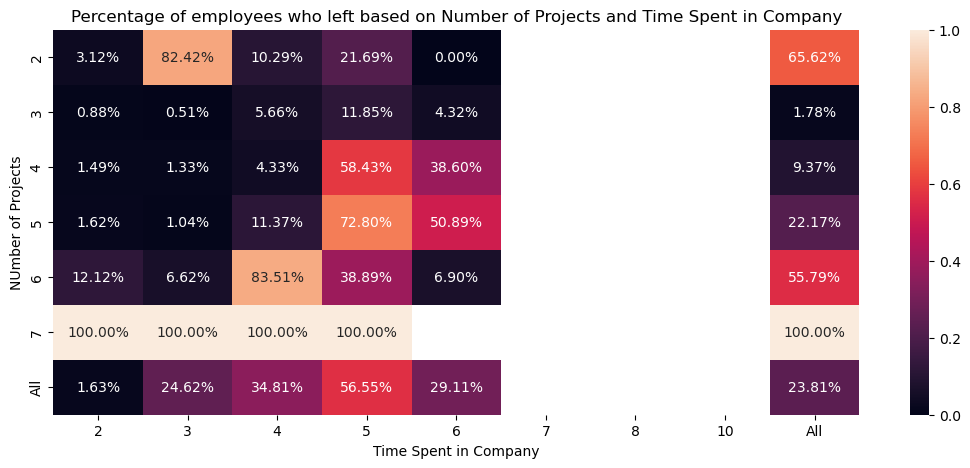

In [39]:
plt.subplots(figsize = (13, 5))
plt.title("Percentage of employees who left based on Number of Projects and Time Spent in Company")
ax = sns.heatmap(df3, annot=True, fmt=".2%")
ax.set(xlabel="Time Spent in Company", ylabel="NUmber of Projects")
plt.show()

### Other than the employees with 7 projects, the highest chance of leaving is for employees with 6 projects in their fourth year, followed by employees with 2 projects in their second year.

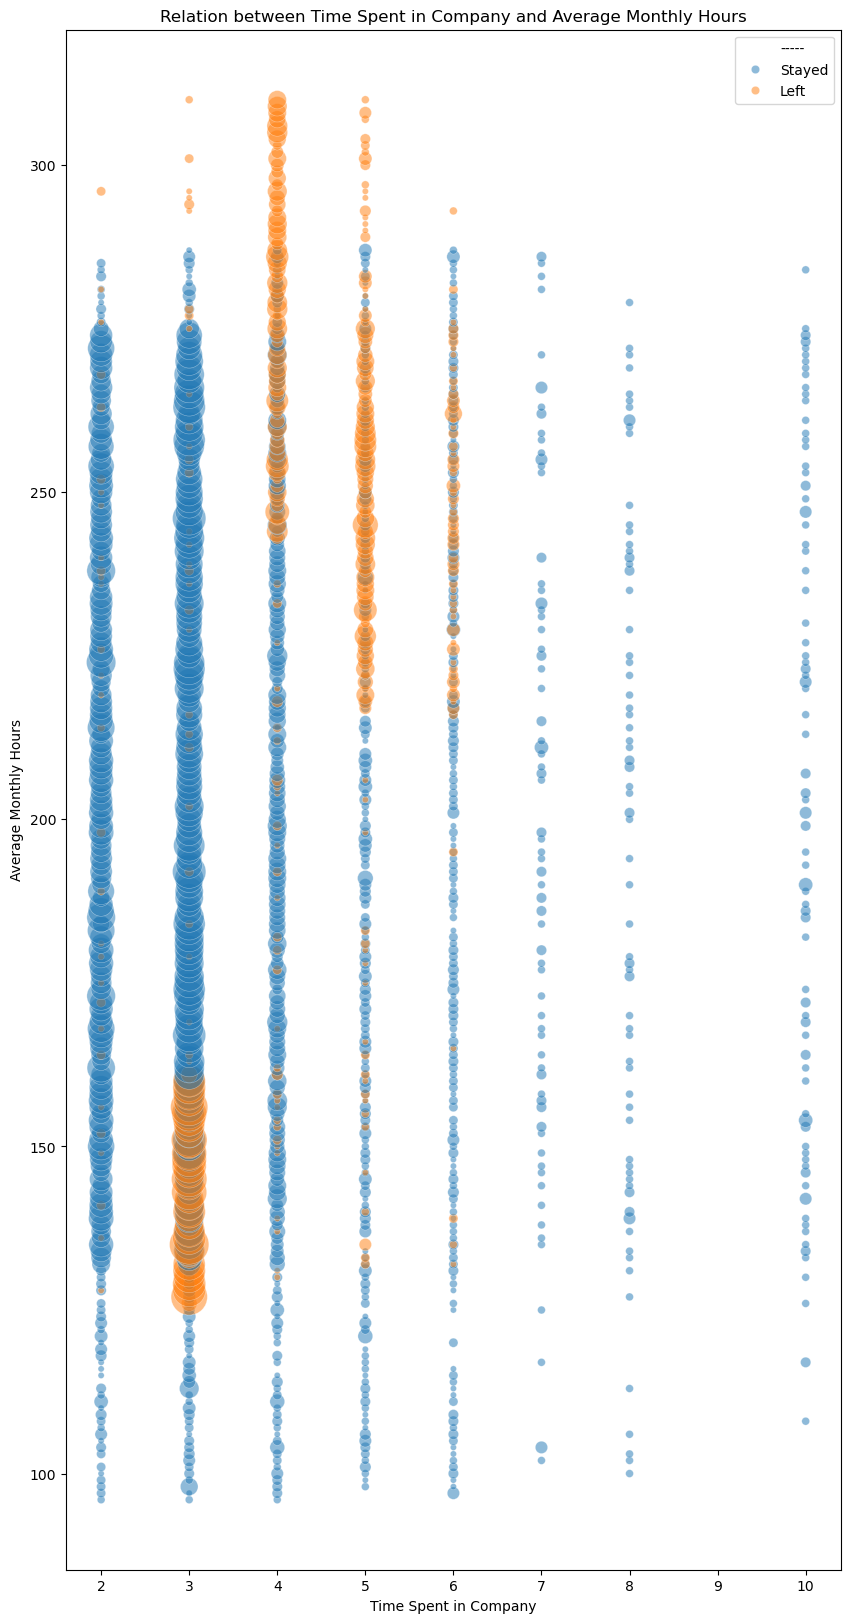

In [40]:
hours_spent = df.groupby(["average_montly_hours", "time_spend_company", "left"]).size().reset_index(name = "Count")

plt.subplots(figsize = (10, 20))
plt.title("Relation between Time Spent in Company and Average Monthly Hours")
ax = sns.scatterplot(data = hours_spent, x = "time_spend_company", y = "average_montly_hours", hue = "left", size = "Count", sizes = (20,800), alpha = 0.5)
ax.set(xlabel="Time Spent in Company", ylabel="Average Monthly Hours")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['-----', 'Stayed', 'Left'])
plt.show()

## Conclusion Based on the Data
### On an average there is a 23.81% chance of an employee leaving. Further:
#### 1. Employees with 7 projects have a **100%** chance of leaving.
#### 2. Employees with a Satisfaction Level below 0.12 have a **100%** chance of leaving.
#### 3. Employees who work for more than 287 hours a month have a **100%** chance of leaving.
#### 4. People who have a *satisfaction level* between **0.35 and 0.45**, work between **120 to 170** *hours monthly* and have a *evaluation score* between **0.45 and 0.57** have over **97%** chance of leaving.
#### 5. People who have a *satisfaction level* between **0.7 and 0.92**, work between **216 to 280** *hours monthly* and have a *evaluation score* between **0.8 and 1** have over **57%** chance of leaving.
#### 6. Employess that have stayed for 7 years or more do not leave.

## Data Preparation for Model Training

In [41]:
# Making a copy of the original data.
data_df = original_df.copy()

In [42]:
# Rename columns for greater accuracy and consistency.
data_df = data_df.rename(columns={"sales": "dept", "Work_accident": "work_accident"})
data_df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years   dept  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [43]:
data_df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [44]:
# Label Encoding for 'salary' column
data_df["salary"] = data_df["salary"].map({"low":1, "medium":2, "high":3})
data_df["salary"].value_counts()

salary
1    7316
2    6446
3    1237
Name: count, dtype: int64

In [45]:
# One-Hot Encoding for 'dept' column.
data_df = pd.get_dummies(data=data_df, columns=["dept"], drop_first=True)
data_df.sample(5)

satisfaction_level  last_evaluation  number_project  \
11930                0.97             0.92               6   
2395                 0.77             0.49               4   
4182                 0.74             0.91               5   
12656                0.79             0.86               5   
14097                0.86             0.62               4   

       average_montly_hours  time_spend_company  work_accident  left  \
11930                   137                   8              1     0   
2395                    266                   2              0     0   
4182                    135                   3              0     0   
12656                   235                   5              0     1   
14097                   186                   3              0     0   

       promotion_last_5years  salary  dept_RandD  dept_accounting  dept_hr  \
11930                      0       1       False            False    False   
2395                       0       1       False            False     True   
4182                       0       2       False            False    False   
12656                      0       2       False            False    False   
14097                      0       1       False            False    False   

       dept_management  dept_marketing  dept_product_mng  dept_sales  \
11930            False           False              True       False   
2395             False           False             False       False   
4182              True           False             False       False   
12656            False           False             False       False   
14097            False           False              True       False   

       dept_support  dept_technical  
11930         False           False  
2395          False           False  
4182          False           False  
12656          True           False  
14097         False           False

In [46]:
# scaler = MinMaxScaler()

# data_df = scaler.fit_transform(data_df.drop(["left"])
# data_df

### Clustering Employees who left based on Satisfaction Level and Last Evaluation Score using K-Means Clustering

In [47]:
km3 = KMeans(n_clusters=3)

In [48]:
kdf = data_df[data_df["left"] == 1][[ "satisfaction_level", "last_evaluation" ]]
kdf.head()

satisfaction_level  last_evaluation
0                0.38             0.53
1                0.80             0.86
2                0.11             0.88
3                0.72             0.87
4                0.37             0.52

In [49]:
km3.fit(kdf)

KMeans(n_clusters=3)

In [50]:
km3.cluster_centers_.round(2)

array([[0.41, 0.52],
       [0.81, 0.91],
       [0.11, 0.87]])

In [51]:
centers = pd.DataFrame(km3.cluster_centers_, columns= kdf.columns[:2])
centers

satisfaction_level  last_evaluation
0            0.410145         0.516982
1            0.808516         0.911709
2            0.111155         0.869301

In [52]:
km3.labels_

array([0, 1, 2, ..., 0, 2, 0])

In [53]:
kdf["cluster"] = km3.labels_
kdf.head()

satisfaction_level  last_evaluation  cluster
0                0.38             0.53        0
1                0.80             0.86        1
2                0.11             0.88        2
3                0.72             0.87        1
4                0.37             0.52        0

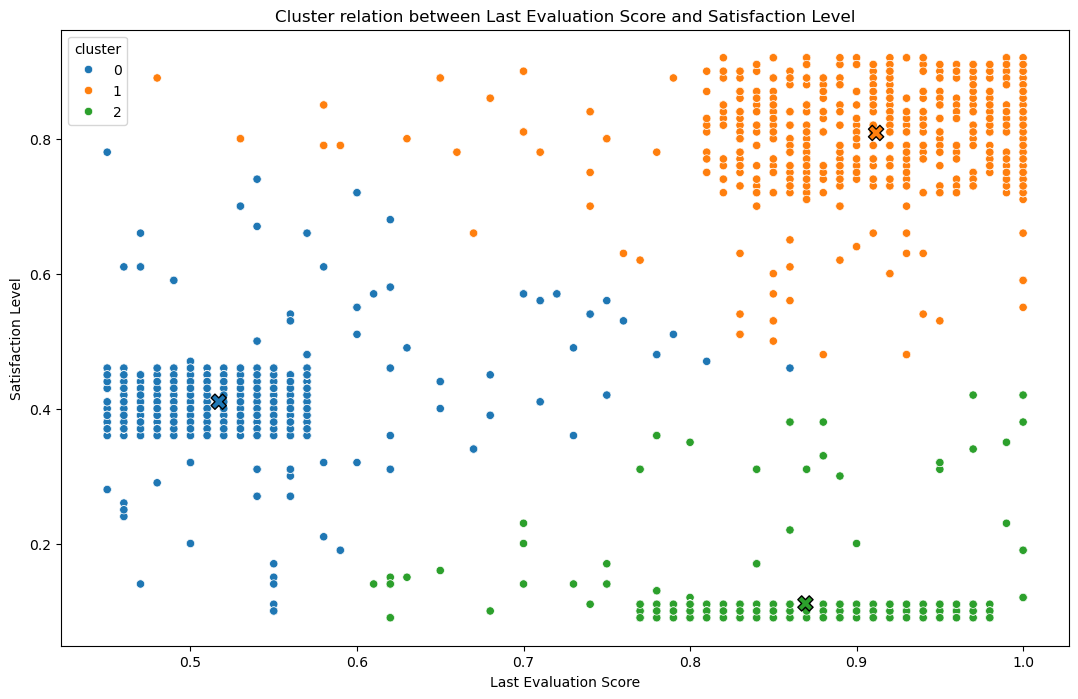

In [54]:
plt.subplots(figsize=(13, 8))
plt.title("Cluster relation between Last Evaluation Score and Satisfaction Level")
ax = sns.scatterplot(data=kdf, x="last_evaluation", y="satisfaction_level", hue="cluster", palette="tab10")
ax.set(xlabel="Last Evaluation Score", ylabel="Satisfaction Level")
sns.scatterplot(data=centers, x="last_evaluation", y="satisfaction_level", hue=centers.index, palette="tab10", legend=False,
                style=True, markers="X", s=120, edgecolor="black", linewidth=1)
plt.show()

#### The clusters centers are shown with an 'X' symbol in the respective colors.

#### The clusters match the conclusions obtained in the EDA Phase.

## Data Preparation for Predictive Models

In [55]:
sdf = data_df.copy()
sdf.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0       1   
1                   6              0     1                      0       2   
2                   4              0     1                      0       2   
3                   5              0     1                      0       1   
4                   3              0     1                      0       1   

   dept_RandD  dept_accounting  dept_hr  dept_management  dept_marketing  \
0       False            False    False            False           False   
1       False            False    False            False           False   
2       False            False    False            False           False   
3       False            False    False            False           False   
4       False            False    False            False           False   

   dept_product_mng  dept_sales  dept_support  dept_technical  
0             False        True         False           False  
1             False        True         False           False  
2             False        True         False           False  
3             False        True         False           False  
4             False        True         False           False

In [56]:
# Defining the Logistic Regression Model
reg = LogisticRegression(max_iter=1000)

# Defining the Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1)

# Defining the Gradient Boosting Classifier Model
gbc = GradientBoostingClassifier(max_depth=5)

# Defining the Cross Validation Model
validator = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

# Defining the Scaling Model
scaler = MinMaxScaler()

# Defining the Oversmapling Model
smote = SMOTE(random_state=123)

In [57]:
#  Creating and verifying X.
x = sdf.drop(["left"], axis=1)
x.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  salary  \
0                   3              0                      0       1   
1                   6              0                      0       2   
2                   4              0                      0       2   
3                   5              0                      0       1   
4                   3              0                      0       1   

   dept_RandD  dept_accounting  dept_hr  dept_management  dept_marketing  \
0       False            False    False            False           False   
1       False            False    False            False           False   
2       False            False    False            False           False   
3       False            False    False            False           False   
4       False            False    False            False           False   

   dept_product_mng  dept_sales  dept_support  dept_technical  
0             False        True         False           False  
1             False        True         False           False  
2             False        True         False           False  
3             False        True         False           False  
4             False        True         False           False

In [58]:
#  Creating and verifying Y.
y = sdf["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

#### Ideally **Recall** should be targeted first as it would be bets to reduce the false negatives first. Employees who are predicted to stay, but leave the organisation, will cause more impact.

### Logistic Regression with 5-Fold CV

Confusion Matrix
[[1746  539]
 [ 149  566]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.76      0.84      2285
           1       0.51      0.79      0.62       715

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.82      0.77      0.78      3000


 ROC AUC Score : 0.778



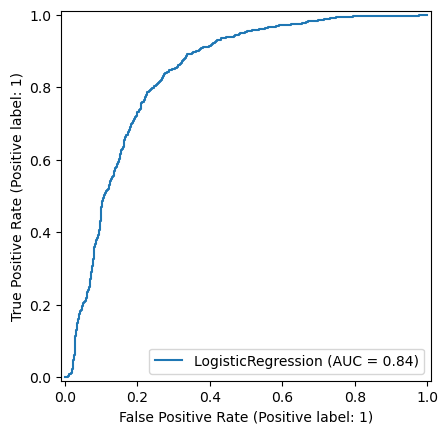



Confusion Matrix
[[1731  555]
 [ 155  559]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2286
           1       0.50      0.78      0.61       714

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.78      3000


 ROC AUC Score : 0.77



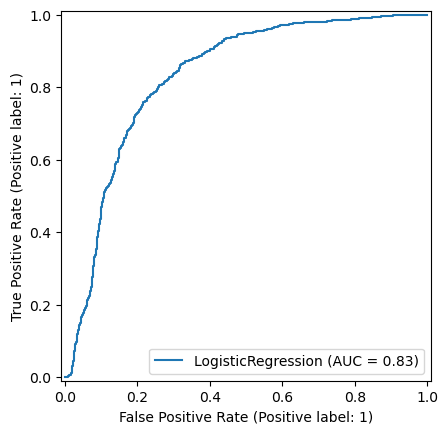



Confusion Matrix
[[1639  647]
 [ 159  555]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      2286
           1       0.46      0.78      0.58       714

    accuracy                           0.73      3000
   macro avg       0.69      0.75      0.69      3000
weighted avg       0.80      0.73      0.75      3000


 ROC AUC Score : 0.747



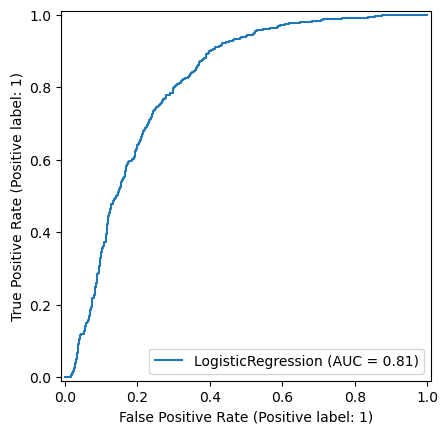



Confusion Matrix
[[1677  609]
 [ 122  592]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      2286
           1       0.49      0.83      0.62       714

    accuracy                           0.76      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.83      0.76      0.77      3000


 ROC AUC Score : 0.781



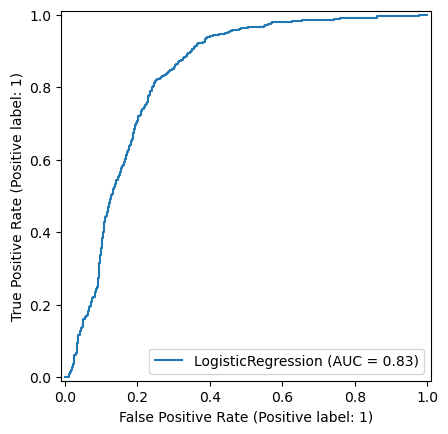



Confusion Matrix
[[1714  571]
 [ 139  575]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2285
           1       0.50      0.81      0.62       714

    accuracy                           0.76      2999
   macro avg       0.71      0.78      0.72      2999
weighted avg       0.82      0.76      0.78      2999


 ROC AUC Score : 0.778



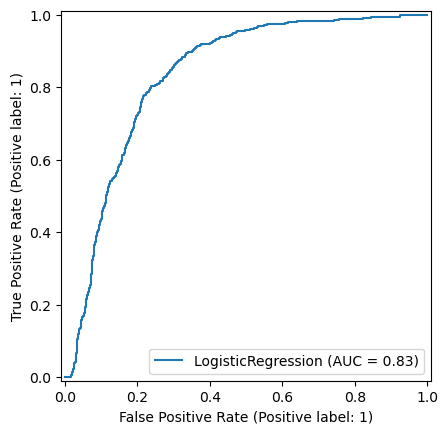

In [59]:
for train_data, test_data in validator.split(x, y):
    # Dividing the data into the different categories
    x_train = x.loc[train_data]
    y_train = y.loc[train_data]
    x_test = x.loc[test_data]
    y_test = y.loc[test_data]

    # Scaling the data
    x_train_sc = scaler.fit_transform(x_train)
    x_test_sc = scaler.transform(x_test)
    
    # Apply oversampling to the data.
    x_train_smote, y_train_smote = smote.fit_resample(x_train_sc, y_train)
    
    # Using the data to fit the Learning Model 
    reg.fit(x_train_smote, y_train_smote)
    pred = reg.predict(x_test_sc)

    print("Confusion Matrix")
    print(confusion_matrix(y_test, pred))
    print("\nClassification Report")
    print(classification_report(y_test, pred))
    print("\n ROC AUC Score :", roc_auc_score(y_test, pred).round(3))
    print("")

    log_disp = RocCurveDisplay.from_estimator(reg, x_test_sc, y_test)
    plt.show()

    print("\n")

### Random Forest with 5-Fold CV

Confusion Matrix
[[2282    3]
 [  14  701]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2285
           1       1.00      0.98      0.99       715

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


 ROC AUC Score : 0.99



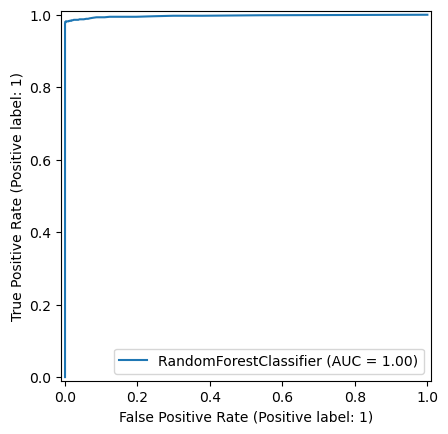



Confusion Matrix
[[2282    4]
 [  22  692]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


 ROC AUC Score : 0.984



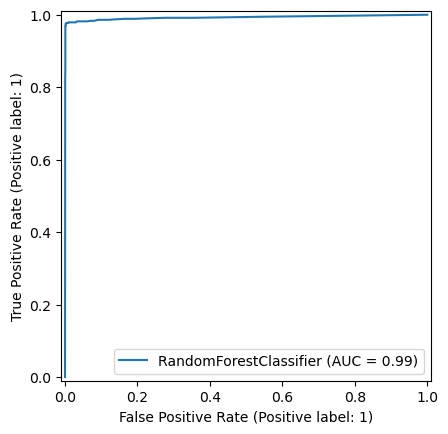



Confusion Matrix
[[2278    8]
 [  17  697]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


 ROC AUC Score : 0.986



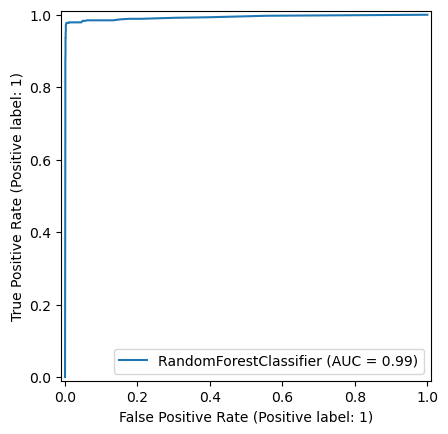



Confusion Matrix
[[2278    8]
 [  27  687]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.96      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


 ROC AUC Score : 0.979



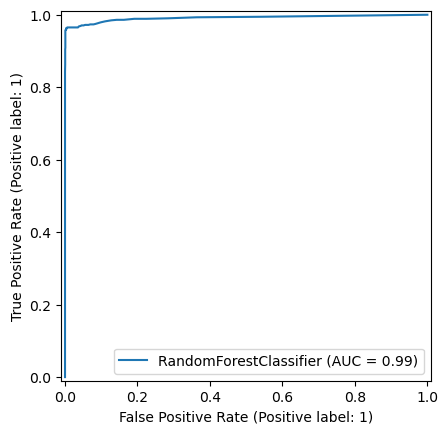



Confusion Matrix
[[2275   10]
 [  19  695]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2285
           1       0.99      0.97      0.98       714

    accuracy                           0.99      2999
   macro avg       0.99      0.98      0.99      2999
weighted avg       0.99      0.99      0.99      2999


 ROC AUC Score : 0.985



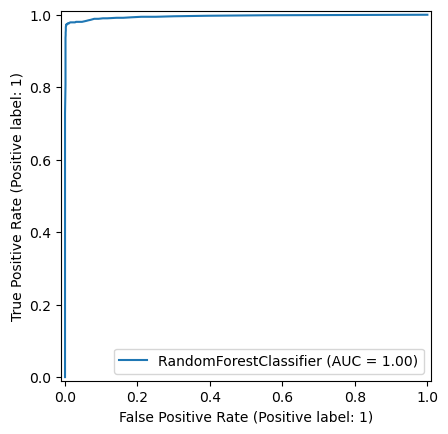

In [60]:
for train_data, test_data in validator.split(x, y):
    # Dividing the data into the different categories
    x_train = x.loc[train_data]
    y_train = y.loc[train_data]
    x_test = x.loc[test_data]
    y_test = y.loc[test_data]

    # Scaling the data
    x_train_sc = scaler.fit_transform(x_train)
    x_test_sc = scaler.transform(x_test)
    
    # Apply oversampling to the data.
    x_train_smote, y_train_smote = smote.fit_resample(x_train_sc, y_train)
    
    # Using the data to fit the Learning Model 
    rfc.fit(x_train_smote, y_train_smote)
    pred = rfc.predict(x_test_sc)

    print("Confusion Matrix")
    print(confusion_matrix(y_test, pred))
    print("\nClassification Report")
    print(classification_report(y_test, pred))
    print("\n ROC AUC Score :", roc_auc_score(y_test, pred).round(3))
    print("")

    log_disp = RocCurveDisplay.from_estimator(rfc, x_test_sc, y_test)
    plt.show()

    print("\n")

### Gradient Boosting with 5-Fold CV

Confusion Matrix
[[2267   18]
 [  31  684]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2285
           1       0.97      0.96      0.97       715

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000


 ROC AUC Score : 0.974



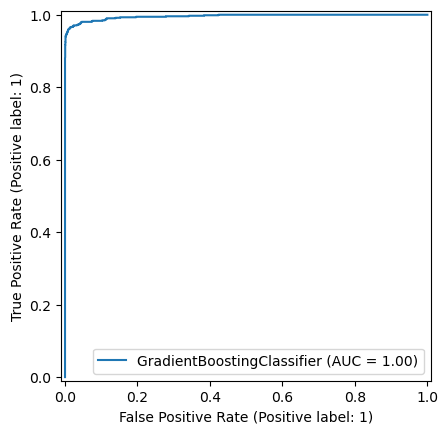



Confusion Matrix
[[2265   21]
 [  47  667]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.97      0.93      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 ROC AUC Score : 0.962



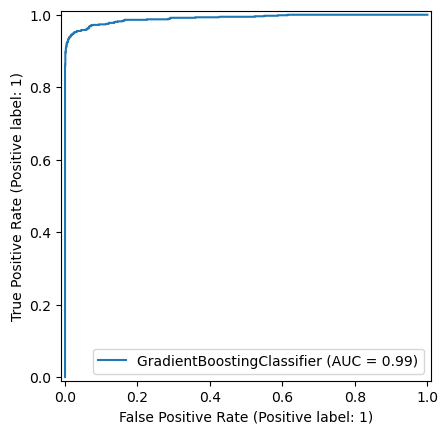



Confusion Matrix
[[2253   33]
 [  40  674]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.95      0.94      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 ROC AUC Score : 0.965



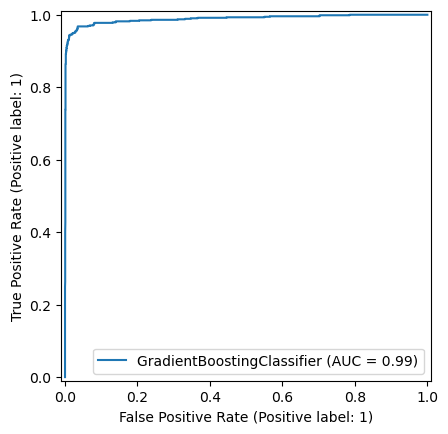



Confusion Matrix
[[2265   21]
 [  46  668]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.97      0.94      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 ROC AUC Score : 0.963



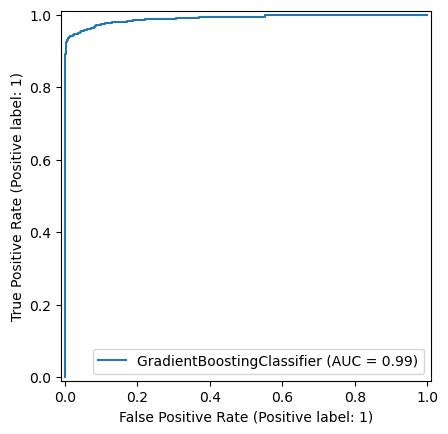



Confusion Matrix
[[2260   25]
 [  39  675]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2285
           1       0.96      0.95      0.95       714

    accuracy                           0.98      2999
   macro avg       0.97      0.97      0.97      2999
weighted avg       0.98      0.98      0.98      2999


 ROC AUC Score : 0.967



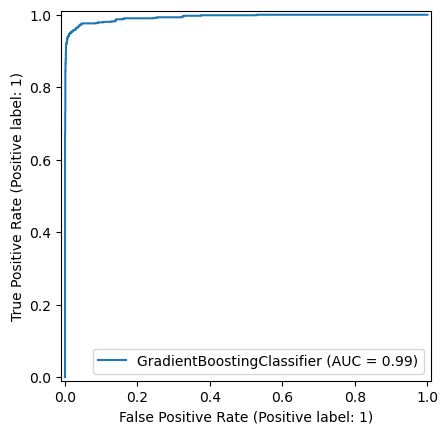

In [61]:
for train_data, test_data in validator.split(x, y):
    # Dividing the data into the different categories
    x_train = x.loc[train_data]
    y_train = y.loc[train_data]
    x_test = x.loc[test_data]
    y_test = y.loc[test_data]

    # Scaling the data
    x_train_sc = scaler.fit_transform(x_train)
    x_test_sc = scaler.transform(x_test)
    
    # Apply oversampling to the data.
    x_train_smote, y_train_smote = smote.fit_resample(x_train_sc, y_train)
    
    # Using the data to fit the Learning Model 
    gbc.fit(x_train_smote, y_train_smote)
    pred = gbc.predict(x_test_sc)

    print("Confusion Matrix")
    print(confusion_matrix(y_test, pred))
    print("\nClassification Report")
    print(classification_report(y_test, pred))
    print("\n ROC AUC Score :", roc_auc_score(y_test, pred).round(3))
    print("")

    log_disp = RocCurveDisplay.from_estimator(gbc, x_test_sc, y_test)
    plt.show()

    print("\n")

#### Based on the scores, the best model seems to be the Random Forest Classifier.

## Peredicting probabilities using Random Forest Classifier

In [62]:
x.sample(5, random_state=123)

satisfaction_level  last_evaluation  number_project  \
6958                0.54             0.67               3   
7534                0.72             0.52               3   
2975                0.95             0.61               3   
3903                0.78             0.79               3   
8437                0.60             0.40               3   

      average_montly_hours  time_spend_company  work_accident  \
6958                   154                   2              0   
7534                   143                   4              1   
2975                   267                   2              0   
3903                   203                   2              0   
8437                   146                   4              1   

      promotion_last_5years  salary  dept_RandD  dept_accounting  dept_hr  \
6958                      0       3       False            False    False   
7534                      0       1       False            False    False   
2975                      0       1        True            False    False   
3903                      0       1       False            False    False   
8437                      0       1       False            False    False   

      dept_management  dept_marketing  dept_product_mng  dept_sales  \
6958            False           False             False        True   
7534            False           False             False       False   
2975            False           False             False       False   
3903            False           False             False        True   
8437            False           False             False       False   

      dept_support  dept_technical  
6958         False           False  
7534          True           False  
2975         False           False  
3903         False           False  
8437         False            True

In [63]:
y.sample(5, random_state=123)

6958    0
7534    0
2975    0
3903    0
8437    0
Name: left, dtype: int64

In [64]:
# Creating and verifying Train and Test Data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=123)

In [65]:
x_train.sample(5, random_state=123)

satisfaction_level  last_evaluation  number_project  \
1686                 0.22             0.86               4   
11300                0.77             0.76               6   
6066                 0.85             0.88               5   
5007                 0.84             0.94               4   
4083                 0.96             0.83               4   

       average_montly_hours  time_spend_company  work_accident  \
1686                    293                   3              0   
11300                   263                   6              0   
6066                    236                   4              0   
5007                    246                   2              1   
4083                    132                   6              0   

       promotion_last_5years  salary  dept_RandD  dept_accounting  dept_hr  \
1686                       0       1       False            False    False   
11300                      0       1       False            False    False   
6066                       0       2       False            False    False   
5007                       0       2       False            False    False   
4083                       0       3       False            False    False   

       dept_management  dept_marketing  dept_product_mng  dept_sales  \
1686             False            True             False       False   
11300            False           False             False        True   
6066             False           False             False       False   
5007             False           False             False       False   
4083             False           False             False       False   

       dept_support  dept_technical  
1686          False           False  
11300         False           False  
6066          False            True  
5007           True           False  
4083          False            True

In [66]:
y_train.sample(5, random_state=123)

1686     1
11300    0
6066     0
5007     0
4083     0
Name: left, dtype: int64

In [67]:
x_test.sample(5, random_state=123)

satisfaction_level  last_evaluation  number_project  \
10582                0.62             0.50               4   
2241                 0.96             1.00               5   
8788                 0.67             0.83               3   
4599                 0.49             0.56               4   
6636                 0.65             0.60               3   

       average_montly_hours  time_spend_company  work_accident  \
10582                   156                   2              0   
2241                    162                   3              0   
8788                    220                   3              0   
4599                    260                   6              0   
6636                    218                   4              0   

       promotion_last_5years  salary  dept_RandD  dept_accounting  dept_hr  \
10582                      0       2       False            False    False   
2241                       0       1       False             True    False   
8788                       0       1       False            False    False   
4599                       0       1       False            False    False   
6636                       0       2        True            False    False   

       dept_management  dept_marketing  dept_product_mng  dept_sales  \
10582            False           False             False       False   
2241             False           False             False       False   
8788             False           False             False        True   
4599             False           False             False        True   
6636             False           False             False       False   

       dept_support  dept_technical  
10582          True           False  
2241          False           False  
8788          False           False  
4599          False           False  
6636          False           False

In [68]:
y_test.sample(5, random_state=123)

10582    0
2241     0
8788     0
4599     0
6636     0
Name: left, dtype: int64

In [69]:
y_train.value_counts()

left
0    9142
1    2857
Name: count, dtype: int64

In [70]:
y_test.value_counts()

left
0    2286
1     714
Name: count, dtype: int64

In [71]:
# Defining Scaler
scaler2 = MinMaxScaler()

# Fitting and Transforming the X.
x_train_sc = scaler2.fit_transform(x_train)
x_test_sc = scaler2.transform(x_test)

In [72]:
x_train_sc.round(2)

array([[0.07, 0.05, 0.6 , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.7 , 0.8 , ..., 0.  , 1.  , 0.  ],
       [0.53, 0.2 , 0.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.3 , 0.23, 0.  , ..., 0.  , 1.  , 0.  ],
       [0.54, 0.67, 0.4 , ..., 0.  , 0.  , 0.  ],
       [0.84, 0.31, 0.2 , ..., 0.  , 0.  , 0.  ]])

In [73]:
x_test_sc.round(2)

array([[0.98, 0.64, 0.2 , ..., 1.  , 0.  , 0.  ],
       [0.74, 0.89, 0.2 , ..., 0.  , 0.  , 0.  ],
       [0.67, 0.89, 0.2 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.85, 0.98, 0.2 , ..., 0.  , 1.  , 0.  ],
       [0.6 , 0.11, 0.6 , ..., 1.  , 0.  , 0.  ],
       [0.77, 0.91, 0.4 , ..., 0.  , 0.  , 1.  ]])

In [74]:
# Apply SMOTE
smote2 = SMOTE(random_state = 123)
x_train_smote, y_train_smote = smote2.fit_resample(x_train_sc, y_train)

In [75]:
y_train_smote.value_counts()

left
0    9142
1    9142
Name: count, dtype: int64

In [76]:
# Defining the Learning Model
rfc2 = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [77]:
rfc2.fit(x_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1)

In [78]:
pred = rfc2.predict(x_test_sc)

In [79]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [80]:
pred_proba = rfc2.predict_proba(x_test_sc)

In [81]:
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [82]:
pred_proba[:, 1]

array([0.  , 0.32, 0.01, ..., 0.02, 0.03, 1.  ])

In [83]:
x_scaled = scaler2.transform(x)
len(x_scaled)

14999

In [84]:
x_proba = rfc2.predict_proba(x_scaled)
x_proba[:, 1]

array([1., 1., 1., ..., 1., 1., 1.])

In [85]:
proba_df = pd.DataFrame(x_proba[:, 1], columns=["probability"])
proba_df

probability
0             1.00
1             1.00
2             1.00
3             0.93
4             1.00
...            ...
14994         1.00
14995         1.00
14996         1.00
14997         1.00
14998         1.00

[14999 rows x 1 columns]

### Preparing a graph using the probablity Data

In [86]:
def categorize(x: float):
    if x < 0.2:
        return "Safe"
    elif x <= 0.6:
        return "Low"
    elif x <= 0.9:
        return "Medium"
    else:
        return "High"

categorize(0.77)

'Medium'

In [87]:
proba_df["zone"] = proba_df["probability"].apply(categorize)
proba_df.head()

probability  zone
0         1.00  High
1         1.00  High
2         1.00  High
3         0.93  High
4         1.00  High

In [88]:
zone_df = proba_df["zone"].value_counts()
zone_df

zone
Safe      11338
High       3374
Medium      179
Low         108
Name: count, dtype: int64

In [89]:
def get_values(val):
    a  = np.round(val/100.*zone_df.sum(), 0)
    return int(a)

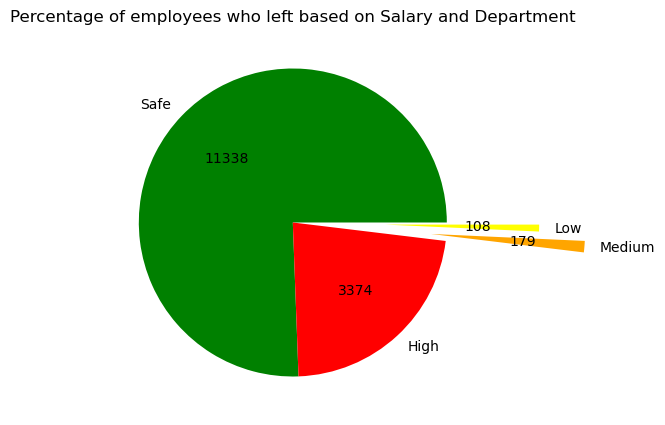

In [90]:
exp = [0, 0, 0.9, 0.6]
plt.subplots(figsize = (13, 5))
plt.title("Percentage of employees who left based on Salary and Department")
plt.pie(zone_df, labels = zone_df.index, explode=exp, autopct=get_values, colors = ["green", "red", "orange", "yellow"])
plt.show()